# Seminar Applied Text Mining
## Session 1: Processing and exploring raw texts
## Notebook 2: Conditional word counting

### Importing packages

As always, we first need to load a number of required Python packages:
- `pandas` provides high-performance, easy-to-use data structures and data analysis tools.
- `NLTK` is a leading platform for building Python programs to work with human language data.
- `itertools` provides functions for creating iterators for efficient looping through data structures.
- `json` allows to read and write JSON files.
- `matplotlib` is a plotting library which produces publication quality figures.

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import itertools
import json
import matplotlib.pyplot as plt

### Load documents
This time, we want to analyze documents with regards to some metadata (i.e., year of publication). Each document is stored in a dictionary with two keys (`text` and `year`). The corpus is stored as a list of dictionaries.

In [ ]:
corpus = [
    {"text":"Hello World", "year":2015},
    {"text":"How are you today?", "year":2015},
    {"text":"The world is nice", "year":2016},
    {"text":"The weather is also nice", "year":2016},
    {"text":"Yesterday, the weather was also nice", "year":2017},
    {"text":"I own two bicycles", "year":2017},
    {"text":"I love to ride my bicycle", "year":2018}
]

In [ ]:
corpus

[{'text': 'Hello World', 'year': 2015},
 {'text': 'How are you today?', 'year': 2015},
 {'text': 'The world is nice', 'year': 2016},
 {'text': 'The weather is also nice', 'year': 2016},
 {'text': 'Yesterday, the weather was also nice', 'year': 2017},
 {'text': 'I own two bicycles', 'year': 2017},
 {'text': 'I love to ride my bicycle', 'year': 2018}]

In real projects, we typically read the documents from an external file instead of creating them by hand.

In [ ]:
file_path = 'docs.json'
corpus = json.loads(open(file_path).read())

In [ ]:
corpus

[{u'text': u'Hello World', u'year': 2015},
 {u'text': u'How are you today?', u'year': 2015},
 {u'text': u'The world is nice', u'year': 2016},
 {u'text': u'The weather is also nice', u'year': 2016},
 {u'text': u'Yesterday, the weather was also nice', u'year': 2017},
 {u'text': u'I own two bicycles', u'year': 2017},
 {u'text': u'I love to ride my bicycle', u'year': 2018}]

### Preprocess documents

We make a copy of the corpus dictionary and iterate over its entries to modify the `text` field (i.e., we tokenize the texts).

In [ ]:
docs_tokenized = corpus[:]
for i, entry in enumerate(docs_tokenized):
    entry["text"] = nltk.word_tokenize(entry["text"])
docs_tokenized

[{u'text': [u'Hello', u'World'], u'year': 2015},
 {u'text': [u'How', u'are', u'you', u'today', u'?'], u'year': 2015},
 {u'text': [u'The', u'world', u'is', u'nice'], u'year': 2016},
 {u'text': [u'The', u'weather', u'is', u'also', u'nice'], u'year': 2016},
 {u'text': [u'Yesterday', u',', u'the', u'weather', u'was', u'also', u'nice'],
  u'year': 2017},
 {u'text': [u'I', u'own', u'two', u'bicycles'], u'year': 2017},
 {u'text': [u'I', u'love', u'to', u'ride', u'my', u'bicycle'], u'year': 2018}]

And we iterate again over the corpus to transform all tokens to lowercase.

In [ ]:
docs_tokenized_lower = docs_tokenized[:]
for i,entry in enumerate(docs_tokenized_lower):
    tokens_lower = []
    for token in entry["text"]:
        tokens_lower.append(token.lower())
    entry["text"] = tokens_lower
docs_tokenized_lower

[{u'text': [u'hello', u'world'], u'year': 2015},
 {u'text': [u'how', u'are', u'you', u'today', u'?'], u'year': 2015},
 {u'text': [u'the', u'world', u'is', u'nice'], u'year': 2016},
 {u'text': [u'the', u'weather', u'is', u'also', u'nice'], u'year': 2016},
 {u'text': [u'yesterday', u',', u'the', u'weather', u'was', u'also', u'nice'],
  u'year': 2017},
 {u'text': [u'i', u'own', u'two', u'bicycles'], u'year': 2017},
 {u'text': [u'i', u'love', u'to', u'ride', u'my', u'bicycle'], u'year': 2018}]

And lemmatize all tokens...

In [ ]:
lemmatizer = WordNetLemmatizer()

docs_tokenized_lower_lemmatized = docs_tokenized_lower[:]
for i,entry in enumerate(docs_tokenized_lower_lemmatized):
    tokens_lemmatized = []
    for token in entry["text"]:
        tokens_lemmatized.append(lemmatizer.lemmatize(token))
    entry["text"] = tokens_lemmatized
docs_tokenized_lower_lemmatized

[{u'text': [u'hello', u'world'], u'year': 2015},
 {u'text': [u'how', u'are', u'you', u'today', u'?'], u'year': 2015},
 {u'text': [u'the', u'world', u'is', u'nice'], u'year': 2016},
 {u'text': [u'the', u'weather', u'is', u'also', u'nice'], u'year': 2016},
 {u'text': [u'yesterday', u',', u'the', u'weather', u'wa', u'also', u'nice'],
  u'year': 2017},
 {u'text': [u'i', u'own', u'two', u'bicycle'], u'year': 2017},
 {u'text': [u'i', u'love', u'to', u'ride', u'my', u'bicycle'], u'year': 2018}]

Finally, we iterate one last time over the corpus to remove stopwords and non-alphanumeric tokens.

In [ ]:
docs_tokenized_lower_lemmatized_cleaned = docs_tokenized_lower_lemmatized[:]
for i,entry in enumerate(docs_tokenized_lower_lemmatized_cleaned):
    tokens_cleaned = []
    for token in entry["text"]:
        if (token not in stopwords.words('english')) & (token.isalpha()):
            tokens_cleaned.append(token)
    entry["text"] = tokens_cleaned
docs_tokenized_lower_lemmatized_cleaned

[{u'text': [u'hello', u'world'], u'year': 2015},
 {u'text': [u'today'], u'year': 2015},
 {u'text': [u'world', u'nice'], u'year': 2016},
 {u'text': [u'weather', u'also', u'nice'], u'year': 2016},
 {u'text': [u'yesterday', u'weather', u'wa', u'also', u'nice'], u'year': 2017},
 {u'text': [u'two', u'bicycle'], u'year': 2017},
 {u'text': [u'love', u'ride', u'bicycle'], u'year': 2018}]

### Conditional word counting
We seperately count words for each condition, that is, for each year. Unfortunately, we have to do this "by hand" and iterate through all docs and tokens and increase the token count for the respective condition.

In [ ]:
cfreq = nltk.ConditionalFreqDist()

for doc in docs_tokenized_lower_lemmatized_cleaned:
    for token in doc["text"]:
        condition = doc["year"]
        cfreq[condition][token] += 1

Print the frequency distributions for all conditions.

In [ ]:
cfreq

<ConditionalFreqDist with 4 conditions>

Print the frequency distributions of the year 2016.

In [ ]:
cfreq[2015]

FreqDist({u'world': 1, u'hello': 1, u'today': 1})

For all years between 2010 and 2020, get the frequency of the word "nice".

In [ ]:
word = "world"
years = range(2010,2020)
word_timeseries = []
for year in years:
    word_timeseries.append(cfreq[year][word])

Print the resulting time series.

In [ ]:
word_timeseries

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0]

Plot the time series.

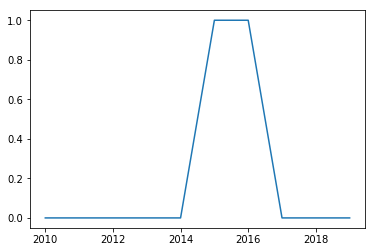

In [ ]:
plt.plot(years, word_timeseries)
plt.show()